# Introduction to Pandas

## 1. What is pandas?
## Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
## 2. Why is pandas so popular?
## Pandas is the *de facto* standard in data analysis and data manipulation in Python. In the backend it stores data as NumPy arrays, which in turns gives C-like performance whilst mantaining code simplicity.
## 3. Any drawback to be aware off?
## Pandas is very memory consuming, if a .csv file is X MB, you should expect pandas to take around 5-10 X memory in your RAM. This becomes a problem if you want to load several GB worth of data. Hence, scalability is not ideal and other technologies should be considered to ingest GB or TB sized data streams


# Pandas Series

## Pandas series are the simplest structure available in Pandas. They, describe a dataset labelled by a index and a single column. For instance, this could be a time-series of a stock price.

In [1]:
import pandas as pd
import numpy as np
# We create a date range
dates = pd.date_range('20200101', periods=200)
# And some random values for a stock
stock_value=100+np.random.normal(0,1,200)

df = pd.Series(stock_value, index=dates, name='stock_price')

print(df)

2020-01-01    100.536939
2020-01-02    102.087930
2020-01-03     99.944879
2020-01-04    100.391046
2020-01-05     99.928878
                 ...    
2020-07-14    101.114993
2020-07-15     99.565977
2020-07-16    100.949771
2020-07-17     98.780758
2020-07-18     98.938041
Freq: D, Name: stock_price, Length: 200, dtype: float64


###  Pandas series offer a number of functionalities, like plotting the data in a very straightforward manner (for more info visit https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html)

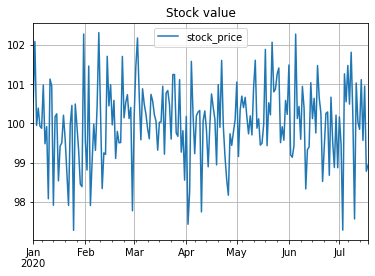

In [2]:
df.plot(title="Stock value",grid=True,legend=True)

### Another useful feature is to be able to display summary statistics of our data set

In [3]:
df.describe()

count    200.000000
mean     100.017591
std        1.013778
min       97.274821
25%       99.444559
50%      100.110827
75%      100.643017
max      102.312875
Name: stock_price, dtype: float64

### We can also display first/last n rows using ```head(n)``` or ```tail(n)```

In [4]:
df.head(5)

2020-01-01    100.536939
2020-01-02    102.087930
2020-01-03     99.944879
2020-01-04    100.391046
2020-01-05     99.928878
Freq: D, Name: stock_price, dtype: float64

In [5]:
df.tail(2)

2020-07-17    98.780758
2020-07-18    98.938041
Freq: D, Name: stock_price, dtype: float64

# Pandas DataFrames
### Before advancing further, let's introduce the concept of a dataframe. A Pandas DataFrame is a collection of Series labelled by the same index, e.g. it could be a collection of Series of Stock prices labelled by their timestamp. Let's have a look at some examples looking at the```yahoo_fin``` library


In [6]:
import yahoo_fin.stock_info as si

AAPL = si.get_data("aapl") # gets Apple's data

In [7]:
type(AAPL) # Check data typr

pandas.core.frame.DataFrame

In [8]:
AAPL

,open,high,low,close,adjclose,volume,ticker
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0,AAPL
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0,AAPL
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0,AAPL
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0,AAPL
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0,AAPL
...,...,...,...,...,...,...,...
2020-10-27,115.489998,117.279999,114.540001,116.599998,116.599998,92276800.0,AAPL
2020-10-28,115.050003,115.430000,111.099998,111.199997,111.199997,143937800.0,AAPL
2020-10-29,112.370003,116.930000,112.199997,115.320000,115.320000,146129200.0,AAPL
2020-10-30,111.059998,111.989998,107.720001,108.860001,108.860001,190272600.0,AAPL


### As mentioned, before ```yahoo_fin``` provides us with a dataframe directly with a number of columns, that can then be accessed by typing ```dataframe.columns```, and likewise for the index, which canbe accessed using  ```dataframe.index```

In [9]:
AAPL.columns

Index(['open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker'], dtype='object')

In [10]:
AAPL.index


DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-11-02'],
              dtype='datetime64[ns]', length=10059, freq=None)

# Storing and loading dataframes
### Pandas offers a number of format compatibility like ```dataframe.to_csv``` .csv,  ```dataframe.to_pickle``` .pickle etc. 

In [11]:
AAPL.to_csv('AAPL.csv',index=True)
pd.read_csv('AAPL.csv',index_col=0)

,open,high,low,close,adjclose,volume,ticker
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0,AAPL
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0,AAPL
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0,AAPL
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0,AAPL
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0,AAPL
...,...,...,...,...,...,...,...
2020-10-27,115.489998,117.279999,114.540001,116.599998,116.599998,92276800.0,AAPL
2020-10-28,115.050003,115.430000,111.099998,111.199997,111.199997,143937800.0,AAPL
2020-10-29,112.370003,116.930000,112.199997,115.320000,115.320000,146129200.0,AAPL
2020-10-30,111.059998,111.989998,107.720001,108.860001,108.860001,190272600.0,AAPL


In [12]:
AAPL.to_pickle('AAPL.pickle')
pd.read_pickle('AAPL.pickle')

,open,high,low,close,adjclose,volume,ticker
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0,AAPL
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0,AAPL
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0,AAPL
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0,AAPL
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0,AAPL
...,...,...,...,...,...,...,...
2020-10-27,115.489998,117.279999,114.540001,116.599998,116.599998,92276800.0,AAPL
2020-10-28,115.050003,115.430000,111.099998,111.199997,111.199997,143937800.0,AAPL
2020-10-29,112.370003,116.930000,112.199997,115.320000,115.320000,146129200.0,AAPL
2020-10-30,111.059998,111.989998,107.720001,108.860001,108.860001,190272600.0,AAPL


# Slicing DataFrames

### Perhaps, not all the information in a dataframe is relevant to us and often case we want to either remove part of it or transform it. Let us start by selecting a single column from the dataframe above. There are a numbers of ways to do this operation:

In [13]:
# Let's assume we are interested in adjclose column in AAPL dataframe
AAPL_adjclose=AAPL.adjclose # we can type explicitly the name of the column
print(type(AAPL_adjclose))
AAPL_adjclose

<class 'pandas.core.series.Series'>


1980-12-12      0.101261
1980-12-15      0.095978
1980-12-16      0.088934
1980-12-17      0.091135
1980-12-18      0.093777
                 ...    
2020-10-27    116.599998
2020-10-28    111.199997
2020-10-29    115.320000
2020-10-30    108.860001
2020-11-02    108.769997
Name: adjclose, Length: 10059, dtype: float64

In [14]:
# Equivalently we can use 
AAPL_adjclose=AAPL['adjclose'] # we can type explicitly the name of the column
print(type(AAPL_adjclose))
AAPL_adjclose

<class 'pandas.core.series.Series'>


1980-12-12      0.101261
1980-12-15      0.095978
1980-12-16      0.088934
1980-12-17      0.091135
1980-12-18      0.093777
                 ...    
2020-10-27    116.599998
2020-10-28    111.199997
2020-10-29    115.320000
2020-10-30    108.860001
2020-11-02    108.769997
Name: adjclose, Length: 10059, dtype: float64

### ***Remark***:  Slicing a dataframe into a single column returns  a Series!

# Creating new columns

In [15]:
AAPL['log_stock_close_adj']=np.log(AAPL.adjclose)

In [16]:
AAPL.head()

,open,high,low,close,adjclose,volume,ticker,log_stock_close_adj
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0,AAPL,-2.290053
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0,AAPL,-2.343637
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0,AAPL,-2.419865
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0,AAPL,-2.395413
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0,AAPL,-2.366840


# Some useful functions
### Pandas provides mean, std,... and a number of functions that can be applied to both axis

In [17]:
AAPL.mean(axis=0)

open                   9.470044e+00
high                   9.571535e+00
low                    9.366959e+00
close                  9.472849e+00
adjclose               8.934424e+00
volume                 3.405308e+08
log_stock_close_adj    9.555770e-02
dtype: float64

In [18]:
AAPL.std(axis=0)

open                   1.819843e+01
high                   1.841035e+01
low                    1.798207e+01
close                  1.820471e+01
adjclose               1.784802e+01
volume                 3.421515e+08
log_stock_close_adj    2.166015e+00
dtype: float64

# Rolling windows

### In time-series it is useful to apply a function on observation windows of size $n$. We can do so using ```dataframe.rolling(n)```

In [19]:
# Let#s compute the 10 day moving average
AAPL.adjclose.rolling(10).mean()

1980-12-12           NaN
1980-12-15           NaN
1980-12-16           NaN
1980-12-17           NaN
1980-12-18           NaN
                 ...    
2020-10-27    117.372001
2020-10-28    116.373000
2020-10-29    115.834000
2020-10-30    114.818001
2020-11-02    114.097000
Name: adjclose, Length: 10059, dtype: float64

# Diff and Shift
### ```dataframe.diff(n)``` computes the difference with respect to the tow n postitions below. Shift ``dataframe.shift(n)``` displaces the dataframe $n$ rows down. Using this functions together we can easily compute returns

In [20]:
i=1
AAPL['daily_return'] = (AAPL.adjclose.diff(i) - AAPL.adjclose.diff(i - 1)) / AAPL.adjclose.shift(i)

In [21]:
AAPL.head()

,open,high,low,close,adjclose,volume,ticker,log_stock_close_adj,daily_return
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0,AAPL,-2.290053,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0,AAPL,-2.343637,-0.052174
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0,AAPL,-2.419865,-0.073395
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0,AAPL,-2.395413,0.024753
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0,AAPL,-2.366840,0.028985


# Slicing using  ```loc ```
### Another approach to slice a dataframe is to use ```dataframe.loc(index,columns)```. This allows to retrieve one or more columns. Let's look at some examples

In [22]:
#We try to obtain adjclose column as before
AAPL_adjclose=AAPL.loc[:,'adjclose']
print(type(AAPL_adjclose))
AAPL_adjclose

<class 'pandas.core.series.Series'>


1980-12-12      0.101261
1980-12-15      0.095978
1980-12-16      0.088934
1980-12-17      0.091135
1980-12-18      0.093777
                 ...    
2020-10-27    116.599998
2020-10-28    111.199997
2020-10-29    115.320000
2020-10-30    108.860001
2020-11-02    108.769997
Name: adjclose, Length: 10059, dtype: float64

In [23]:
#Let's slice high and low
AAPL_high_low=AAPL.loc[:,['low','high']]
print(type(AAPL_high_low))
AAPL_high_low

<class 'pandas.core.frame.DataFrame'>


,low,high
1980-12-12,0.128348,0.128906
1980-12-15,0.121652,0.122210
1980-12-16,0.112723,0.113281
1980-12-17,0.115513,0.116071
1980-12-18,0.118862,0.119420
...,...,...
2020-10-27,114.540001,117.279999
2020-10-28,111.099998,115.430000
2020-10-29,112.199997,116.930000
2020-10-30,107.720001,111.989998


### ***Remark***: When multiple columns are sliced, the returned object is again a pandas dataframe

### It is also posible to slice index and columns at the same time. Let's assume we are only interested in 2020 high and low data. And let's use  ```plot() ``` and  ```describe() ``` in the outcome 

In [24]:
import datetime
#I strongly recommend to have a look at datetime module as you will be often dealing with this when using time-series data 
datetime.datetime(2020, 5, 17)

datetime.datetime(2020, 5, 17, 0, 0)

<class 'pandas.core.frame.DataFrame'>


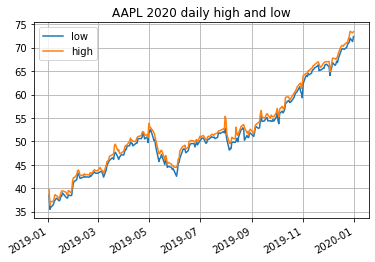

In [25]:
import datetime
# We select just 2019 dates
dates_2019=AAPL.index[(AAPL.index>=datetime.datetime(2019, 1, 1)) & (AAPL.index<datetime.datetime(2020, 1, 1))]
#We slice the dataframe
AAPL_high_low=AAPL.loc[dates_2019,['low','high']]
print(type(AAPL_high_low))
#Plot the data
AAPL_high_low.plot(grid=True,title='AAPL 2020 daily high and low')

In [26]:
print(AAPL_high_low.describe())

              low        high
count  252.000000  252.000000
mean    51.567907   52.457927
std      8.576434    8.621376
min     35.500000   36.430000
25%     45.879376   46.958125
50%     50.398750   51.178751
75%     55.326874   56.260000
max     72.379997   73.492500


# Slicing using  ```iloc```
### in order to use loc one needs to specify the index and column precisely. Using .iloc we can treat the Dataframe as if it was a numpy array and slice using integers as usual

In [27]:
AAPL.iloc[-100:,[0,2,3]]# gives last 100 rows for columns # 0 2 3

,open,low,close
2020-06-12,86.180000,83.555000,84.699997
2020-06-15,83.312500,83.144997,85.747498
2020-06-16,87.864998,86.180000,88.019997
2020-06-17,88.787498,87.772499,87.897499
2020-06-18,87.852501,87.305000,87.932503
...,...,...,...
2020-10-27,115.489998,114.540001,116.599998
2020-10-28,115.050003,111.099998,111.199997
2020-10-29,112.370003,112.199997,115.320000
2020-10-30,111.059998,107.720001,108.860001


### ***Remark***: There is also the option to cast a dataframe or series into a numpy array using  ```.values ```. Note that this operation will get rid of the index column. 

In [28]:
AAPL.values

array([[0.1283482164144516, 0.12890625, 0.1283482164144516, ..., 'AAPL',
        -2.2900533008403805, nan],
       [0.1222098246216774, 0.1222098246216774, 0.1216517835855484, ...,
        'AAPL', -2.3436371419583812, -0.05217352915857003],
       [0.11328125, 0.11328125, 0.1127232164144516, ..., 'AAPL',
        -2.419864897792482, -0.07339485720238678],
       ...,
       [112.37000274658203, 116.93000030517578, 112.19999694824219, ...,
        'AAPL', 4.747710870123862, 0.0370503854285147],
       [111.05999755859375, 111.98999786376953, 107.72000122070312, ...,
        'AAPL', 4.690062658612811, -0.05601802897648285],
       [109.11000061035156, 110.68000030517578, 107.31999969482422, ...,
        'AAPL', 4.68923553024308, -0.0008267863933540868]], dtype=object)

In [29]:
AAPL.low.values

array([  0.12834822,   0.12165178,   0.11272322, ..., 112.19999695,
       107.72000122, 107.31999969])

# ```at``` and ```iat```: retrieving single values
### When retrieving a single value from a dataframe it is much more efficient to use ```at```/```iat``` instead of ```loc```/```iloc```

In [30]:
%timeit AAPL.iloc[0,0]
%timeit AAPL.iat[0,0]

12 µs ± 174 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
11.2 µs ± 171 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Boolean slicing

### We can also slice a dataframe whenever a boolean condition is satisfied

In [31]:
# Filter data by volume
AAPL.loc[AAPL.volume<10000000,]

,open,high,low,close,adjclose,volume,ticker,log_stock_close_adj,daily_return
1981-02-05,0.127790,0.128906,0.127790,0.127790,0.100821,7929600.0,AAPL,-2.294410,0.000000
1981-03-05,0.116071,0.116071,0.115513,0.115513,0.091135,5376000.0,AAPL,-2.395413,-0.004807
1981-03-25,0.117746,0.117746,0.116629,0.116629,0.092016,7056000.0,AAPL,-2.385798,-0.018779
1981-03-30,0.110491,0.111607,0.110491,0.110491,0.087173,9900800.0,AAPL,-2.439865,0.000000
1981-04-14,0.124442,0.125000,0.124442,0.124442,0.098179,6652800.0,AAPL,-2.320961,0.000000
1981-05-07,0.123884,0.124442,0.123884,0.123884,0.097739,9363200.0,AAPL,-2.325455,0.013698
1981-05-08,0.125000,0.125558,0.125000,0.125000,0.098619,7907200.0,AAPL,-2.316487,0.009009
1981-05-12,0.122210,0.123884,0.122210,0.122210,0.096418,4256000.0,AAPL,-2.339061,0.000000
1981-05-13,0.122210,0.123326,0.121652,0.121652,0.095978,4905600.0,AAPL,-2.343637,-0.004566
1981-05-14,0.121094,0.121094,0.119978,0.119978,0.094657,4928000.0,AAPL,-2.357494,-0.013762


# Carefull with copies!!!

In [32]:
df2=AAPL
print(AAPL.iloc[0,0])
df2.iloc[0,0]=0
print(AAPL.iloc[0,0])

0.1283482164144516
0.0


# Iterating over Dataframes
### Sometime our analysis requires to go row by row in a dataframe to perform a numerical operation. To do this we can use ```iterrows``` or ```itertuples``` . 

In [33]:
import time
high_low_mid=np.zeros(len(AAPL))
index=0
start_time=time.time()
for row in AAPL.iterrows():
    high_low_mid[index]=0.5*(row[1].high+row[1].low)
    index+=1
print("iterrows took", time.time()-start_time,"seconds")

iterrows took 0.5641810894012451 seconds


In [34]:
print(high_low_mid)

[1.28627233e-01 1.21930804e-01 1.13002233e-01 ... 1.14564999e+02
 1.09855000e+02 1.09000000e+02]


In [35]:
high_low_mid=np.zeros(len(AAPL))
index=0
start_time=time.time()
for row in AAPL.itertuples():    
    high_low_mid[index]=0.5*(row.high+row.low)
    index+=1
print("itertuples took", time.time()-start_time,"seconds")

itertuples took 0.019968509674072266 seconds


In [36]:
print(high_low_mid)

[1.28627233e-01 1.21930804e-01 1.13002233e-01 ... 1.14564999e+02
 1.09855000e+02 1.09000000e+02]


### If going row by row is necessary (as we will see in a minute, vectorisation is always preferred), most of the time `itertuples` is much more efficient 

# Vectorisation in DataFrame Columns and slices
### As mentioned in the beginning of the session, internally Pandas stores the data as numpy arrays. Hence, we can make use of vectorisation to speed up computations

In [37]:
%timeit high_low_mid=0.5*(AAPL.high+AAPL.low)

146 µs ± 3.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [38]:
high_low_mid=0.5*(AAPL.high+AAPL.low)
high_low_mid.values

array([1.28627233e-01, 1.21930804e-01, 1.13002233e-01, ...,
       1.14564999e+02, 1.09855000e+02, 1.09000000e+02])

In [39]:
#We can apply the same pinciple if we want a slice corresponding to 2019 data

dates_2019=AAPL.index[(AAPL.index>=datetime.datetime(2019, 1, 1)) & (AAPL.index<datetime.datetime(2020, 1, 1))]

%timeit high_low_mid_2019=0.5*(AAPL.high[dates_2019]+AAPL.low[dates_2019])# gives some performance improvement

%timeit high_low_mid_2019=0.5*(AAPL.loc[dates_2019,'high']+AAPL.loc[dates_2019,'low'])



434 µs ± 7.23 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
461 µs ± 3.54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Complex functions and  ```apply```
### Using ```apply``` we can vectorise any user-defined function that supports vectorisation and apply it indexwise (axis=1) or columnwise (axis=0). One can further optimize the method by setting ```raw=False``` which will make assume objects to be numpy arrays internally

In [40]:
AAPL=AAPL.loc[:,['open','high','low','close']]

In [41]:
# Columnwuse
def my_func(x):
    # Function will be applied columnwise x represents the entire column
    return x.max() -x.min()

%timeit AAPL.apply(my_func,axis=0,raw=False)
%timeit AAPL.apply(my_func,axis=0,raw=True)

AAPL.apply(my_func,axis=0,raw=False)
    

906 µs ± 37.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
166 µs ± 790 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


open     137.589996
high     137.930331
low      130.480892
close    134.130886
dtype: float64

In [42]:
def my_func_high_low_mid(x):
    
     # Function will be applied rowise, x the entire 
    return 0.5*(x.high+x.low) #here we assume x mantains the column structure

def my_func_high_low_mid2(x):
    # Function will be applied rowise, x the entire row casted to numpy array
    return 0.5*(x[1]+x[2]) # We need to use integer slicing

%timeit AAPL.apply(my_func_high_low_mid,axis=1,raw=False)
%timeit AAPL.apply(my_func_high_low_mid2,axis=1,raw=True)

118 ms ± 846 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
17.9 ms ± 183 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### As you can see ```raw=False``` can give dramatic performance improvements as data will be treated as a numpy array

# Join/Merge/Concatenate/Append dataframes and series

## 1 Join and Merge

### Now that we have a clear view on basic data manipulation, we can ask ourselves how can we merge data from different Stocks?

In [43]:
list_of_symbols=['aapl','amzn','dis','msft','spy']

dict_of_df={}
for symbol in list_of_symbols:
    dict_of_df[symbol]=si.get_data(symbol) 



In [44]:
dict_of_df['amzn']

,open,high,low,close,adjclose,volume,ticker
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,AMZN
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,AMZN
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,AMZN
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,AMZN
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,AMZN
...,...,...,...,...,...,...,...
2020-10-27,3224.939941,3291.659912,3211.300049,3286.330078,3286.330078,4291000,AMZN
2020-10-28,3249.300049,3264.020020,3162.469971,3162.780029,3162.780029,5588300,AMZN
2020-10-29,3201.270020,3257.250000,3164.000000,3211.010010,3211.010010,6596500,AMZN
2020-10-30,3157.750000,3167.000000,3019.000000,3036.149902,3036.149902,8386400,AMZN


In [45]:
dict_of_df['aapl']

,open,high,low,close,adjclose,volume,ticker
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0,AAPL
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0,AAPL
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0,AAPL
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0,AAPL
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0,AAPL
...,...,...,...,...,...,...,...
2020-10-27,115.489998,117.279999,114.540001,116.599998,116.599998,92276800.0,AAPL
2020-10-28,115.050003,115.430000,111.099998,111.199997,111.199997,143937800.0,AAPL
2020-10-29,112.370003,116.930000,112.199997,115.320000,115.320000,146129200.0,AAPL
2020-10-30,111.059998,111.989998,107.720001,108.860001,108.860001,190272600.0,AAPL


### We can merge two dataframes by index using ```merge```. By setting ```how='inner'``` we make sure that only intersecting indices will be selected and likewise setting ```left_index=True```, ```right_index=True``` we make sure that both indices are being considered 

In [46]:
%timeit merged_df1=dict_of_df['aapl'].merge(dict_of_df['amzn'],how='inner',left_index=True, right_index=True,suffixes=('_aapl','_amzn'))

1.13 ms ± 4.52 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [47]:
merged_df1=dict_of_df['aapl'].merge(dict_of_df['amzn'],how='inner',left_index=True, right_index=True,suffixes=('_aapl','_amzn'))
merged_df1.head()

,open_aapl,high_aapl,low_aapl,close_aapl,adjclose_aapl,volume_aapl,ticker_aapl,open_amzn,high_amzn,low_amzn,close_amzn,adjclose_amzn,volume_amzn,ticker_amzn
1997-05-15,0.158482,0.160714,0.156250,0.158482,0.136951,99008000.0,AAPL,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,AMZN
1997-05-16,0.156250,0.157366,0.154018,0.154018,0.133093,93296000.0,AAPL,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,AMZN
1997-05-19,0.156250,0.157366,0.151786,0.151786,0.131164,52259200.0,AAPL,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,AMZN
1997-05-20,0.151786,0.155692,0.149554,0.154018,0.133093,84828800.0,AAPL,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,AMZN
1997-05-21,0.152902,0.152902,0.147321,0.150670,0.130200,122248000.0,AAPL,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,AMZN


### Likewise we can perform the same operation using  ```join```

In [48]:
%timeit merged_df2=dict_of_df['aapl'].join(dict_of_df['amzn'],how='inner',lsuffix='_aapl',rsuffix='_amzn')

1.13 ms ± 2.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [49]:
merged_df2=dict_of_df['aapl'].join(dict_of_df['amzn'],how='inner',lsuffix='_aapl',rsuffix='_amz')
merged_df2.head()

,open_aapl,high_aapl,low_aapl,close_aapl,adjclose_aapl,volume_aapl,ticker_aapl,open_amz,high_amz,low_amz,close_amz,adjclose_amz,volume_amz,ticker_amz
1997-05-15,0.158482,0.160714,0.156250,0.158482,0.136951,99008000.0,AAPL,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,AMZN
1997-05-16,0.156250,0.157366,0.154018,0.154018,0.133093,93296000.0,AAPL,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,AMZN
1997-05-19,0.156250,0.157366,0.151786,0.151786,0.131164,52259200.0,AAPL,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,AMZN
1997-05-20,0.151786,0.155692,0.149554,0.154018,0.133093,84828800.0,AAPL,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,AMZN
1997-05-21,0.152902,0.152902,0.147321,0.150670,0.130200,122248000.0,AAPL,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,AMZN


### ***Remark***: the difference between ```merge``` and ```join``` is that ```merge``` allows for more flexibility allowing to merge by column values as well. In general, merge performance tends to be better at the cost of providing more arguments

## 2. Append
### ```append``` allows to add additional rows to an existing dataframe

In [50]:
AAPL.append({"open": 100,"high": 100,"low": 100,"close": 100,"adjclose": 100 ,"volume": 100, "ticker": 'AAPL'  },ignore_index=True)

,open,high,low,close,adjclose,ticker,volume
0,0.000000,0.128906,0.128348,0.128348,NaN,NaN,NaN
1,0.122210,0.122210,0.121652,0.121652,NaN,NaN,NaN
2,0.113281,0.113281,0.112723,0.112723,NaN,NaN,NaN
3,0.115513,0.116071,0.115513,0.115513,NaN,NaN,NaN
4,0.118862,0.119420,0.118862,0.118862,NaN,NaN,NaN
...,...,...,...,...,...,...,...
10055,115.050003,115.430000,111.099998,111.199997,NaN,NaN,NaN
10056,112.370003,116.930000,112.199997,115.320000,NaN,NaN,NaN
10057,111.059998,111.989998,107.720001,108.860001,NaN,NaN,NaN
10058,109.110001,110.680000,107.320000,108.769997,NaN,NaN,NaN


In [51]:
dict_of_df['aapl'].append(dict_of_df['amzn'])

,open,high,low,close,adjclose,volume,ticker
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0,AAPL
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0,AAPL
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0,AAPL
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0,AAPL
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0,AAPL
...,...,...,...,...,...,...,...
2020-10-27,3224.939941,3291.659912,3211.300049,3286.330078,3286.330078,4291000.0,AMZN
2020-10-28,3249.300049,3264.020020,3162.469971,3162.780029,3162.780029,5588300.0,AMZN
2020-10-29,3201.270020,3257.250000,3164.000000,3211.010010,3211.010010,6596500.0,AMZN
2020-10-30,3157.750000,3167.000000,3019.000000,3036.149902,3036.149902,8386400.0,AMZN


## 3. Concat and Multi_indexing
### Concatenate allows to merge multiple df at once, but will create a multi-index/multi-column data frame

In [52]:
df1=pd.concat(dict_of_df,axis=1)

In [53]:
df2=pd.concat(dict_of_df,axis=0)

### This introduces multi_indexing

In [54]:
df1.columns

MultiIndex([('aapl',     'open'),
            ('aapl',     'high'),
            ('aapl',      'low'),
            ('aapl',    'close'),
            ('aapl', 'adjclose'),
            ('aapl',   'volume'),
            ('aapl',   'ticker'),
            ('amzn',     'open'),
            ('amzn',     'high'),
            ('amzn',      'low'),
            ('amzn',    'close'),
            ('amzn', 'adjclose'),
            ('amzn',   'volume'),
            ('amzn',   'ticker'),
            ( 'dis',     'open'),
            ( 'dis',     'high'),
            ( 'dis',      'low'),
            ( 'dis',    'close'),
            ( 'dis', 'adjclose'),
            ( 'dis',   'volume'),
            ( 'dis',   'ticker'),
            ('msft',     'open'),
            ('msft',     'high'),
            ('msft',      'low'),
            ('msft',    'close'),
            ('msft', 'adjclose'),
            ('msft',   'volume'),
            ('msft',   'ticker'),
            ( 'spy',     'open'),
            ( 

In [55]:
df1.loc[:,('msft','close')]

1970-03-25           NaN
1970-03-26           NaN
1970-03-30           NaN
1970-03-31           NaN
1970-04-01           NaN
                 ...    
2020-10-27    213.250000
2020-10-28    202.679993
2020-10-29    204.720001
2020-10-30    202.470001
2020-11-02    202.330002
Name: (msft, close), Length: 12768, dtype: float64

In [56]:
df2.index

MultiIndex([('aapl', '1980-12-12'),
            ('aapl', '1980-12-15'),
            ('aapl', '1980-12-16'),
            ('aapl', '1980-12-17'),
            ('aapl', '1980-12-18'),
            ('aapl', '1980-12-19'),
            ('aapl', '1980-12-22'),
            ('aapl', '1980-12-23'),
            ('aapl', '1980-12-24'),
            ('aapl', '1980-12-26'),
            ...
            ( 'spy', '2020-10-20'),
            ( 'spy', '2020-10-21'),
            ( 'spy', '2020-10-22'),
            ( 'spy', '2020-10-23'),
            ( 'spy', '2020-10-26'),
            ( 'spy', '2020-10-27'),
            ( 'spy', '2020-10-28'),
            ( 'spy', '2020-10-29'),
            ( 'spy', '2020-10-30'),
            ( 'spy', '2020-11-02')],
           length=44459)

In [57]:
df2.loc[('aapl'),:]

,open,high,low,close,adjclose,volume,ticker
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0,AAPL
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0,AAPL
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0,AAPL
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0,AAPL
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0,AAPL
...,...,...,...,...,...,...,...
2020-10-27,115.489998,117.279999,114.540001,116.599998,116.599998,92276800.0,AAPL
2020-10-28,115.050003,115.430000,111.099998,111.199997,111.199997,143937800.0,AAPL
2020-10-29,112.370003,116.930000,112.199997,115.320000,115.320000,146129200.0,AAPL
2020-10-30,111.059998,111.989998,107.720001,108.860001,108.860001,190272600.0,AAPL


# Groupby


### Groupy allows to index data using different columns or compute summary statistics for groups wihin the data. Let's look at some option data


In [58]:
import yfinance as yf
import numpy as np
import pandas
aapl = yf.Ticker("AMZN")

In [59]:
pd.read_csv('AMZN_options.csv')

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,expiration_date,option_type
0,AMZN201106C01820000,2020-11-02 18:28:21,1820.0,1148.70,1139.35,1143.20,-62.51001,-5.160956,15.0,4.0,0.000010,True,REGULAR,USD,2020-11-06,C
1,AMZN201106C01830000,2020-11-02 18:28:21,1830.0,1146.25,1123.35,1127.75,-56.18994,-4.672994,1.0,2.0,0.000010,True,REGULAR,USD,2020-11-06,C
2,AMZN201106C01840000,2020-11-02 18:28:21,1840.0,1128.45,1116.55,1120.70,-62.75000,-5.267797,1.0,2.0,0.000010,True,REGULAR,USD,2020-11-06,C
3,AMZN201106C01850000,2020-11-02 18:28:21,1850.0,1126.00,1108.85,1112.60,-56.47998,-4.776401,1.0,3.0,0.000010,True,REGULAR,USD,2020-11-06,C
4,AMZN201106C01870000,2020-11-02 14:34:36,1870.0,1201.10,1086.10,1092.25,-17.23999,-1.415039,2.0,2.0,0.000010,True,REGULAR,USD,2020-11-06,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6032,AMZN230120P03600000,2020-10-28 16:43:01,3600.0,980.00,1061.70,1078.45,0.00000,0.000000,1.0,2.0,0.375985,True,REGULAR,USD,2023-01-20,P
6033,AMZN230120P03900000,2020-09-30 15:21:16,3900.0,1166.30,1227.55,1245.00,0.00000,0.000000,1.0,0.0,0.340918,True,REGULAR,USD,2023-01-20,P
6034,AMZN230120P04000000,2020-10-21 13:47:58,4000.0,1247.25,1359.95,1376.50,0.00000,0.000000,55.0,59.0,0.371846,True,REGULAR,USD,2023-01-20,P
6035,AMZN230120P04800000,2020-10-14 19:58:31,4800.0,1795.00,2017.40,2033.00,0.00000,0.000000,5.0,4.0,0.363714,True,REGULAR,USD,2023-01-20,P


In [60]:
option_data=option_data.dropna()

NameError: name 'option_data' is not defined

In [ ]:
option_data.head()

### the syntax is ```dataframe.groupby([columns])```

In [ ]:
option_data.groupby(["expiration_date","option_type"]).count()

In [ ]:
grouped_option_chain=option_data.groupby(["expiration_date","option_type","strike"]).mean()

In [ ]:
grouped_option_chain

In [ ]:
grouped_option_chain.loc[('2020-11-06','C'),:]

# Remove missing data ```dropna``` and ```interpolate```


In [ ]:
### Let's introduce some missing values and see how we can remove or interpolate values

In [ ]:
AAPL_copy=AAPL.iloc[:,:-1]
AAPL_copy.iloc[2,:]=np.nan
AAPL_copy.head()

In [ ]:
# Dropna just removes the rows that contain a NaN
AAPL_copy.dropna(axis=0)
# We can also use axis=1 to drop columns

In [ ]:
AAPL_copy.interpolate(method='linear', axis=0)

# Further reading for big data

### If you are dealing with big data is likely that pandas will consume all your memory, so other tools are preferred which use *lazy evaluation* like VAEX https://pypi.org/project/vaex/ or PySpark https://spark.apache.org/docs/latest/api/python/index.html 

### Lazy evaluation essentially means that a plan will be set to execute your operation, but it won't be actually executed until you need to retrieve a value. For instance creating a new column can be a lazy operation until we need to retrieve some value in that column.

### This approach allows to use multiprocessing to speed up calculations